# Init Working Directory

In [1]:
import os

cwd = os.getcwd()

if cwd.endswith('prototype'):
    PATH = os.path.join('..', 'data', 'handwritten-hanacaraka')
    os.chdir(PATH)
    new_cwd = os.getcwd()

    print(f"The current working directory was: {cwd}")
    print(f"It has been changed to: {new_cwd}")

else:
    print(f"The current working directory is: {cwd}")

The current working directory was: C:\Users\Helmy\hanacaraka-classifier\prototype
It has been changed to: C:\Users\Helmy\hanacaraka-classifier\data\handwritten-hanacaraka


# Removing Corrupted Datas

In [2]:
from PIL import Image

subdirs = [d for d in os.listdir() if os.path.isdir(d)]

image_files = []
for subdir in subdirs:
    image_files.extend([os.path.join(subdir, f) for f in os.listdir(subdir) if f.endswith('.png')])

print(f'Number of image files: {len(image_files)}\n')

Number of image files: 1579



In [3]:
corrupted_files = []
for image_file in image_files:
    try:
        img = Image.open(image_file)
    except:
        corrupted_files.append(image_file)

print(f'Number of corrupted files: {len(corrupted_files)}\n')

Number of corrupted files: 17



In [4]:
image_files = [f for f in image_files if f not in corrupted_files]

print(f'Number of image files after removing corrupted files: {len(image_files)}\n')

Number of image files after removing corrupted files: 1562



# Create New Directory for Selected Datas (Non-corrupted)

In [5]:
import shutil
import os


if (os.getcwd().endswith('handwritten-hanacaraka') 
        or not 
        os.path.exists(os.path.join('..', 'clean-hanacaraka'))):
    new_dir = os.path.join('..', 'clean-hanacaraka')

    for image_file in image_files:
        if os.name == 'nt':
            subdir, filename = image_file.split('\\')
        else:
            subdir, filename = image_file.split('/')
        subdir_path = os.path.join(new_dir, subdir)
        os.makedirs(subdir_path, exist_ok=True)
        new_filename = f'{subdir}_{len(os.listdir(subdir_path)) + 1}.png'
        shutil.copy(image_file, os.path.join(subdir_path, new_filename))

change the working directory to the new directory

In [6]:
os.chdir(new_dir)
new_cwd = os.getcwd()

print(f"The current working directory were: {new_cwd}")

The current working directory were: C:\Users\Helmy\hanacaraka-classifier\data\clean-hanacaraka


# Image Preprocessing

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

the image were not clean, so we need to preprocess the image. Example of unclean image:

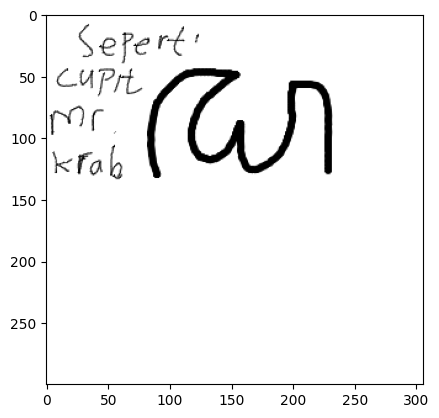

In [8]:
sample_img = ("dha\dha_21.png")
sample_img = cv2.imread(sample_img, cv2.IMREAD_GRAYSCALE)
plt.imshow(sample_img, cmap='gray')
plt.show()

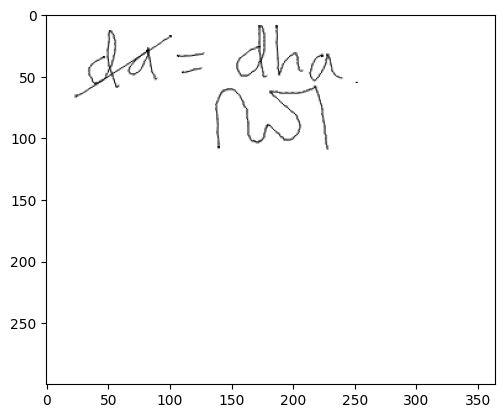

In [9]:
sample_img = ("dha\dha_37.png")
sample_img = cv2.imread(sample_img, cv2.IMREAD_GRAYSCALE)
plt.imshow(sample_img, cmap='gray')
plt.show()

function for preprocess the image

In [10]:
def cvt_grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [11]:
def erode_img(img, kernel_size=(3,3)):
    kernel = np.ones(kernel_size, np.uint8)
    return cv2.erode(img, kernel, iterations=1)

In [12]:
def normalize_img(img):
    return (img / 255.0 * 255).astype(np.uint8)

pipeline for preprocess the image

In [13]:
preprocess_timeline = [
    cvt_grayscale,
    erode_img,
    normalize_img,
]

In [14]:
def preprocess_img(path):
    image_file = cv2.imread(path)
    num_of_process = len(preprocess_timeline) + 1
    
    fig, axs = plt.subplots(num_of_process, 1, figsize=(5, 5*num_of_process))
    fig.suptitle('Preprocessing Timeline',                 
                 fontsize=20,
                 fontweight='bold',
                 )
    
    axs[0].imshow(image_file, cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    
    for i in range(1, num_of_process):
        _temp_img = preprocess_timeline[i-1](image_file)
        image_file = _temp_img
        axs[i].imshow(_temp_img, cmap='gray')
        axs[i].set_title(preprocess_timeline[i-1].__name__)
        axs[i].axis('off')
        
    fig.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
    
    for ax in axs:
        ax.set_title(ax.get_title(), fontweight='semibold', fontsize='x-large')
        ax.label_outer()

    plt.subplots_adjust(top=0.95)

    plt.show()

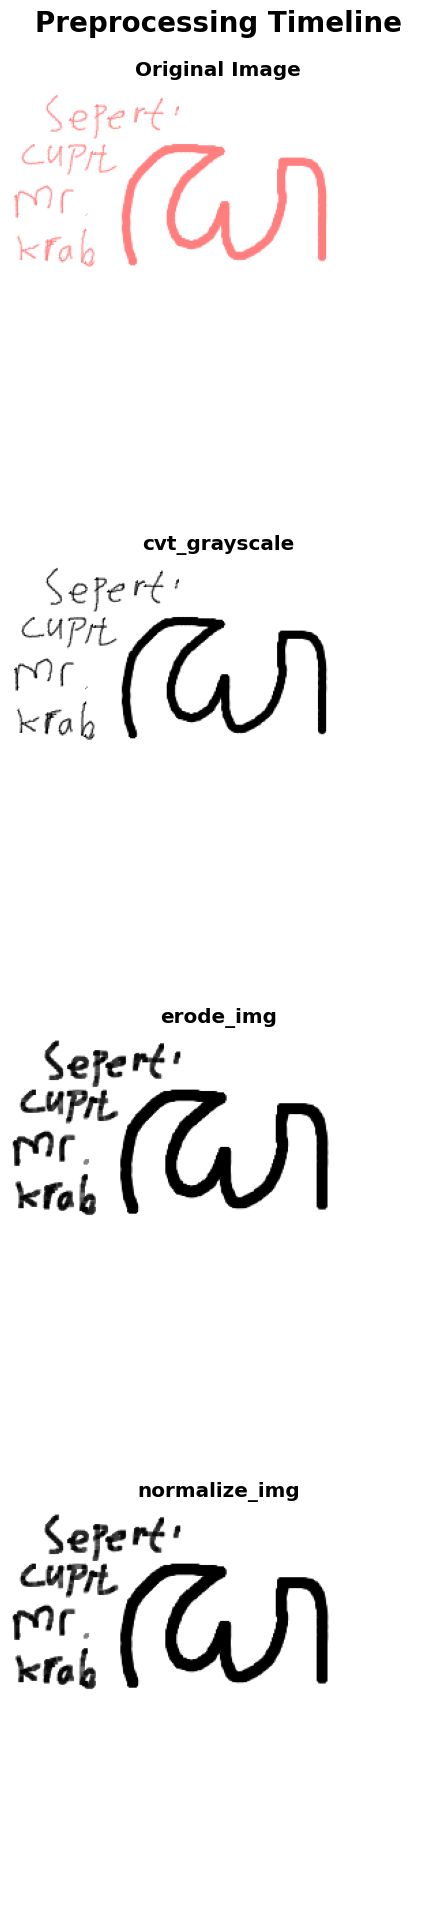

In [15]:
sample_img = ("dha\dha_21.png")

preprocess_img(sample_img)

# Computer Vision Timee

The baseline model will be cnn, so we need to do lot of data augmentation to the image

In [16]:
import torchvision.transforms as transforms
from PIL import Image

OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\Helmy\AppData\Roaming\Python\Python310\site-packages\torch\lib\shm.dll" or one of its dependencies.